In [86]:
import pandas as pd
import numpy as np
import os 
from datetime import datetime
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import statsmodels.api as sm
from io import StringIO
import requests
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Change directory
os.chdir('/Users/alisa.babikova/Downloads')

In [88]:
filename = 'weather_ca_feb_to_oct.csv'
weather_cali = pd.read_csv(filename)
weather_cali = weather_cali.drop(['Unnamed: 0'], axis = 1)

weather_cali.head()

,County,Date,DewPoint,PrecipIntensity,PrecipProbability,Pressure,State,Sunlight,Temperature
0,Yolo,1999-02-01,38.545417,0.000000,0.000000,1028.815417,CA,0.625000,44.003750
1,Yolo,1999-02-02,37.672500,0.000013,0.029167,1027.131667,CA,0.625000,43.675000
2,Yolo,1999-02-03,40.195417,0.000000,0.000000,1017.541250,CA,0.625000,47.405000
3,Yolo,1999-02-04,41.251667,0.000000,0.000000,1012.668333,CA,0.625000,48.374167
4,Yolo,1999-02-05,37.771667,0.000000,0.000000,1019.655417,CA,0.666667,45.095000


In [89]:
# Convert Date column to datetime format 
weather_cali.Date = pd.to_datetime(weather_cali.Date)
weather_cali.Date.dt.month.head()

0    2
1    2
2    2
3    2
4    2
Name: Date, dtype: int64

In [90]:
# keep vars for only 2-7 months, so Feb to June
weather2 = weather_cali[weather_cali.Date.dt.month == 2]
weather3 = weather_cali[weather_cali.Date.dt.month == 3]
weather4 = weather_cali[weather_cali.Date.dt.month == 4]
weather5 = weather_cali[weather_cali.Date.dt.month == 5]
weather6 = weather_cali[weather_cali.Date.dt.month == 6]

weather_cali = weather2.append([weather3,weather4,weather5,weather6],
                                          ignore_index = True, sort = True)
weather_cali.head()

,County,Date,DewPoint,PrecipIntensity,PrecipProbability,Pressure,State,Sunlight,Temperature
0,Yolo,1999-02-01,38.545417,0.000000,0.000000,1028.815417,CA,0.625000,44.003750
1,Yolo,1999-02-02,37.672500,0.000013,0.029167,1027.131667,CA,0.625000,43.675000
2,Yolo,1999-02-03,40.195417,0.000000,0.000000,1017.541250,CA,0.625000,47.405000
3,Yolo,1999-02-04,41.251667,0.000000,0.000000,1012.668333,CA,0.625000,48.374167
4,Yolo,1999-02-05,37.771667,0.000000,0.000000,1019.655417,CA,0.666667,45.095000


In [91]:
filename = '228636F2-534D-3ADC-A171-78E819C0A6B2.csv'
yield_county = pd.read_csv(filename)
yield_county = yield_county.drop(['Program', 'Period', 'Geo Level', 'State ANSI','Week Ending','County ANSI','Ag District','Ag District Code', 'Zip Code', 'Region', 'watershed_code','Watershed', 'Commodity', 'Data Item', 'Domain', 'Domain Category', 'CV (%)' ], axis = 1)

yield_county.head()

,Year,State,County,Value
0,2017,CALIFORNIA,CONTRA COSTA,44.04
1,2017,CALIFORNIA,SAN BENITO,35.82
2,2017,CALIFORNIA,COLUSA,46.16
3,2017,CALIFORNIA,OTHER (COMBINED) COUNTIES,38.22
4,2017,CALIFORNIA,SACRAMENTO,46.70


In [92]:
# Split into CA yield only for analysis
yield_county_ca = yield_county[yield_county.State == 'CALIFORNIA']

In [93]:
yield_county_ca.County.unique()

array(['CONTRA COSTA', 'SAN BENITO', 'COLUSA',
       'OTHER (COMBINED) COUNTIES', 'SACRAMENTO', 'SOLANO', 'SUTTER',
       'YOLO', 'FRESNO', 'KERN', 'KINGS', 'MADERA', 'MERCED',
       'SAN JOAQUIN', 'STANISLAUS', 'GLENN', 'SANTA CLARA'], dtype=object)

In [94]:
weather_cali.County.unique()

array(['Yolo', 'Sutter', 'Stanislaus', 'Solano', 'Santa Clara',
       'San Joaquin', 'San Benito', 'Sacramento', 'Merced', 'Madera',
       'Kings', 'Kern', 'Glenn', 'Fresno', 'Contra Costa'], dtype=object)

In [95]:
# Convert Date column to datetime format 
weather_cali.Date = pd.to_datetime(weather_cali.Date)
weather_cali.Date.dt.year.head()

0    1999
1    1999
2    1999
3    1999
4    1999
Name: Date, dtype: int64

In [96]:
# Set Year as a separete column
weather_cali['Year'] = weather_cali.Date.dt.year

In [97]:
# Set Year as a separete column
weather_cali['Year'] = weather_cali.Date.dt.year

### Weather Variable Creation - Avg, Min, Max

In [98]:
# Drop Date column 
weather_cali = weather_cali.drop(['Date'], axis = 1)

In [99]:
weather_avg = weather_cali.groupby(['Year','County'])[['Temperature','DewPoint','PrecipIntensity','PrecipProbability','Pressure','Sunlight']].mean().sort_values(by='Year', ascending=False)

In [100]:
weather_min = weather_cali.groupby(['Year','County'])[['Temperature','DewPoint','PrecipIntensity','PrecipProbability','Pressure','Sunlight']].min().sort_values(by='Year', ascending=False)

In [101]:
weather_max = weather_cali.groupby(['Year','County'])[['Temperature','DewPoint','PrecipIntensity','PrecipProbability','Pressure','Sunlight']].max().sort_values(by='Year', ascending=False)

In [102]:
weather_avg.columns = ['Avg_Temp','Avg_DewPoint','Avg_PrInt','Avg_PrProb','Avg_Pressure','Avg_Sunlight']

In [103]:
weather_avg.columns

Index(['Avg_Temp', 'Avg_DewPoint', 'Avg_PrInt', 'Avg_PrProb', 'Avg_Pressure',
       'Avg_Sunlight'],
      dtype='object')

In [104]:
weather_min.columns

Index(['Temperature', 'DewPoint', 'PrecipIntensity', 'PrecipProbability',
       'Pressure', 'Sunlight'],
      dtype='object')

In [105]:
weather_min.columns = ['Min_Temp','Min_DewPoint','Min_PrInt','Min_PrProb','Min_Pressure','Min_Sunlight']

In [106]:
weather_max.columns

Index(['Temperature', 'DewPoint', 'PrecipIntensity', 'PrecipProbability',
       'Pressure', 'Sunlight'],
      dtype='object')

In [107]:
weather_max.columns = ['Max_Temp','Max_DewPoint','Max_PrInt','Max_PrProb','Max_Pressure','Max_Sunlight']

In [108]:
weather_max.head()

Max_Temp  Max_DewPoint  Max_PrInt  Max_PrProb  \
Year County                                                         
2018 Yolo          85.066522     55.775833   0.053967    0.862083   
     Sacramento    82.645217     55.987500   0.052792    0.779583   
     Contra Costa  79.087391     55.784167   0.049700    0.903750   
     Fresno        86.625000     56.338750   0.068029    0.720833   
     Glenn         61.379583     38.904583   0.000000    0.000000   

                   Max_Pressure  Max_Sunlight  
Year County                                    
2018 Yolo           1027.989583      2.958333  
     Sacramento     1027.815652      2.958333  
     Contra Costa   1028.396250      2.958333  
     Fresno         1028.039167      2.958333  
     Glenn          1016.190000      0.000000

In [109]:
weather_comb = pd.merge(weather_avg,weather_min, on =['Year','County'])

In [110]:
weather_comb = pd.merge(weather_comb,weather_max,on =['Year','County'])

In [111]:
weather_comb.head()

Avg_Temp  Avg_DewPoint  Avg_PrInt  Avg_PrProb  \
Year County                                                         
2018 Yolo          60.172732     44.942065   0.001753    0.044552   
     Sacramento    59.839877     45.840678   0.002380    0.053757   
     Contra Costa  55.597641     44.568461   0.002015    0.049612   
     Fresno        63.983156     44.788524   0.001638    0.035504   
     Glenn         61.379583     38.904583   0.000000    0.000000   

                   Avg_Pressure  Avg_Sunlight   Min_Temp  Min_DewPoint  \
Year County                                                              
2018 Yolo           1015.560039      1.910265  41.382500     20.582917   
     Sacramento     1015.446240      1.906333  40.156667     23.052917   
     Contra Costa   1016.447065      1.868700  39.874167     24.210417   
     Fresno         1015.532964      1.976043  42.171250     21.971667   
     Glenn          1016.190000      0.000000  61.379583     38.904583   

                   Min_PrInt  Min_PrProb  Min_Pressure  Min_Sunlight  \
Year County                                                            
2018 Yolo                0.0         0.0   1004.284167      0.625000   
     Sacramento          0.0         0.0   1004.185833      0.625000   
     Contra Costa        0.0         0.0   1005.892917      0.666667   
     Fresno              0.0         0.0   1004.516250      0.666667   
     Glenn               0.0         0.0   1016.190000      0.000000   

                    Max_Temp  Max_DewPoint  Max_PrInt  Max_PrProb  \
Year County                                                         
2018 Yolo          85.066522     55.775833   0.053967    0.862083   
     Sacramento    82.645217     55.987500   0.052792    0.779583   
     Contra Costa  79.087391     55.784167   0.049700    0.903750   
     Fresno        86.625000     56.338750   0.068029    0.720833   
     Glenn         61.379583     38.904583   0.000000    0.000000   

                   Max_Pressure  Max_Sunlight  
Year County                                    
2018 Yolo           1027.989583      2.958333  
     Sacramento     1027.815652      2.958333  
     Contra Costa   1028.396250      2.958333  
     Fresno         1028.039167      2.958333  
     Glenn          1016.190000      0.000000

In [112]:
# Reset the index ==> take the vars out
weather_comb = weather_comb.reset_index()

In [113]:
weather_comb.head()

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_PrInt,Min_PrProb,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight
0,2018,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,0.0,0.0,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333
1,2018,Sacramento,59.839877,45.840678,0.002380,0.053757,1015.446240,1.906333,40.156667,23.052917,0.0,0.0,1004.185833,0.625000,82.645217,55.987500,0.052792,0.779583,1027.815652,2.958333
2,2018,Contra Costa,55.597641,44.568461,0.002015,0.049612,1016.447065,1.868700,39.874167,24.210417,0.0,0.0,1005.892917,0.666667,79.087391,55.784167,0.049700,0.903750,1028.396250,2.958333
3,2018,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,0.0,0.0,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333
4,2018,Glenn,61.379583,38.904583,0.000000,0.000000,1016.190000,0.000000,61.379583,38.904583,0.0,0.0,1016.190000,0.000000,61.379583,38.904583,0.000000,0.000000,1016.190000,0.000000


### Combine both datasets into one weather_yield dataset for CA only

In [114]:
# Convert County names into same case across both datasets 
yield_county_ca.County = yield_county.County.str.title()
yield_county_ca.head()

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Year,State,County,Value
0,2017,CALIFORNIA,Contra Costa,44.04
1,2017,CALIFORNIA,San Benito,35.82
2,2017,CALIFORNIA,Colusa,46.16
3,2017,CALIFORNIA,Other (Combined) Counties,38.22
4,2017,CALIFORNIA,Sacramento,46.70


In [115]:
# Merge two datasets
weather_yield = pd.merge(weather_comb,yield_county_ca,on =['Year','County'])

In [116]:
# Check for null values
weather_yield.isna().sum().sum()

0

In [117]:
# Check for null values
weather_yield.isna().sum().sum()

0

In [119]:
weather_yield = weather_yield[weather_yield.Year >= 2010]
weather_yield.County.unique()

array(['Sacramento', 'Contra Costa', 'Fresno', 'Kern', 'Kings', 'Madera',
       'Merced', 'Stanislaus', 'San Benito', 'San Joaquin', 'Solano',
       'Sutter', 'Yolo'], dtype=object)

In [120]:
# Export the clean dataset
weather_yield.to_csv('weather_yield_2010-17.csv')

### 2016 Dataset - Weather, NDVI, Yield 2016, Yield 2015

In [121]:
weather_2016 = weather_yield[weather_yield.Year == 2016]
weather_2016 = weather_2016.rename(index=str, columns={"Value": "Yield 2016"})
weather_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Yield 2016
13,2016,Sacramento,63.396360,48.131098,0.002053,0.047471,1015.753311,1.858180,43.998333,27.612917,...,1002.404167,0.458333,85.825000,57.302917,0.038804,0.824348,1030.471250,2.958333,CALIFORNIA,46.81
14,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,...,1006.263333,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,CALIFORNIA,50.03
15,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,...,1006.236520,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,CALIFORNIA,46.40
16,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,...,1006.545420,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,CALIFORNIA,54.74
17,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,...,1004.561304,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,CALIFORNIA,47.74
18,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,...,1003.546667,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,CALIFORNIA,39.80
19,2016,San Benito,52.615656,44.114370,0.000933,0.028060,1018.228489,1.962429,34.869167,29.138333,...,1005.181250,0.625000,72.850000,51.405833,0.026729,0.573750,1029.906667,3.083333,CALIFORNIA,43.14
20,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,...,1003.125830,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,CALIFORNIA,45.83
21,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,...,1002.524583,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,CALIFORNIA,46.43
22,2016,Sutter,64.262940,47.997489,0.001955,0.046710,1015.771442,1.852109,43.547917,27.960833,...,1002.208750,0.458333,86.869167,57.932083,0.058033,0.826957,1030.677917,2.958333,CALIFORNIA,47.90


In [122]:
#Look at unique values
weather_2016.County.unique()

array(['Sacramento', 'Fresno', 'Kern', 'Kings', 'Merced', 'Stanislaus',
       'San Benito', 'San Joaquin', 'Solano', 'Sutter', 'Yolo'],
      dtype=object)

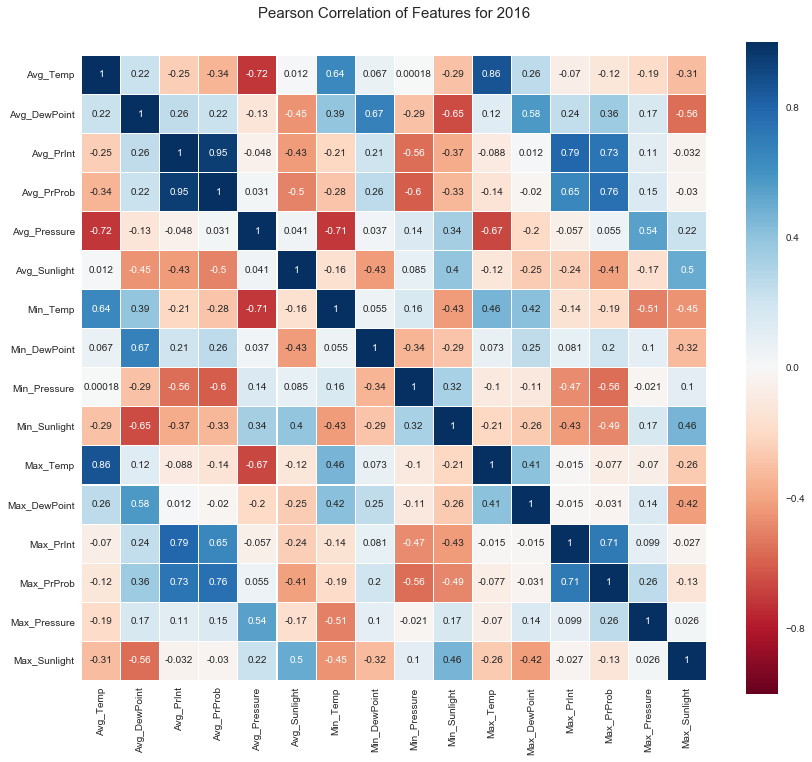

In [41]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features for 2016', y=1.05, size=15)
sns.heatmap(weather_yield.drop(['Year','Min_PrInt','Min_PrProb','Value'], axis =1).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [123]:
yield_2015 = weather_yield[weather_yield.Year == 2015]
yield_2015 = yield_2015[['County','Value']]
yield_2015 = yield_2015.rename(index=str, columns={"Value": "Yield 2015"})
yield_2015

,County,Yield 2015
24,Fresno,50.89
25,Kern,45.66
26,Kings,50.79
27,Merced,48.61
28,Sacramento,40.24
29,San Joaquin,42.29
30,Solano,44.73
31,Stanislaus,43.05
32,Sutter,44.92
33,Yolo,48.62


In [124]:
# Merge with weather_2016 dataset
weather_2016 = pd.merge(weather_2016,yield_2015,on =['County'])
weather_2016 = weather_2016.drop(['State','Min_PrInt','Min_PrProb'], axis = 1)
weather_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2016,Yield 2015
0,2016,Sacramento,63.396360,48.131098,0.002053,0.047471,1015.753311,1.858180,43.998333,27.612917,1002.404167,0.458333,85.825000,57.302917,0.038804,0.824348,1030.471250,2.958333,46.81,40.24
1,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,1006.263333,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,50.03,50.89
2,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,1006.236520,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,46.40,45.66
3,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,1006.545420,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,54.74,50.79
4,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,1004.561304,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,47.74,48.61
5,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,1003.546667,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,39.80,43.05
6,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,1003.125830,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,45.83,42.29
7,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,1002.524583,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,46.43,44.73
8,2016,Sutter,64.262940,47.997489,0.001955,0.046710,1015.771442,1.852109,43.547917,27.960833,1002.208750,0.458333,86.869167,57.932083,0.058033,0.826957,1030.677917,2.958333,47.90,44.92
9,2016,Yolo,63.218358,47.457014,0.001843,0.044927,1015.844188,1.877208,43.168333,26.532083,1002.607917,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,46.90,48.62


### Get updated NDVI values

In [125]:
# Get updated NDVI and merge with weather_yield
filename = 'weather_ndvi_2016_updated.csv'
weather_ndvi_2016 = pd.read_csv(filename)
weather_ndvi_2016 = weather_ndvi_2016.drop(['Unnamed: 0'], axis = 1)
weather_ndvi_2016

,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2016,Yield 2015,NDVI
0,Fresno,68.917982,47.394091,0.001274,0.025053,1015.066813,2.000926,41.815417,33.372083,1006.263333,0.541667,92.063750,55.725417,0.043450,0.588750,1030.474167,2.958333,50.03,50.89,0.46
1,Kern,68.662711,41.943261,0.000818,0.019835,1014.728082,2.165124,39.931667,27.670417,1006.236520,0.625000,92.739583,53.150417,0.020871,0.422500,1029.892500,3.130435,46.40,45.66,0.54
2,Kings,69.673009,45.681656,0.000225,0.011041,1015.359134,2.042363,41.900000,30.452083,1006.545420,0.583333,92.374167,56.678750,0.009479,0.387083,1030.874170,2.916667,54.74,50.79,0.50
3,Merced,66.839028,48.589316,0.001150,0.024381,1014.984140,2.079730,42.762917,28.665000,1004.561304,0.541667,87.891667,58.118333,0.041350,0.697500,1030.223750,2.916667,47.74,48.61,0.54
4,Stanislaus,67.180559,49.332413,0.001240,0.029647,1015.160856,2.080019,43.950417,28.714167,1003.546667,0.458333,87.996250,58.341667,0.041283,0.860417,1030.282917,2.916667,39.80,43.05,0.62
5,San Joaquin,66.467338,49.437463,0.001214,0.032974,1015.226188,2.075639,44.765833,28.850833,1003.125830,0.458333,86.941250,58.316250,0.041167,0.882500,1030.190830,3.086957,45.83,42.29,0.59
6,Solano,63.099358,48.674040,0.001571,0.037229,1015.436205,2.033425,44.892500,28.545000,1002.524583,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,46.43,44.73,0.54
7,Yolo,65.236900,48.287353,0.001529,0.037284,1015.167616,2.030907,43.168333,26.532083,1002.607917,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,46.90,48.62,0.51


In [126]:
ndvi_2016 = weather_ndvi_2016[['County', 'NDVI']]
ndvi_2016 # 8 counties 

,County,NDVI
0,Fresno,0.46
1,Kern,0.54
2,Kings,0.50
3,Merced,0.54
4,Stanislaus,0.62
5,San Joaquin,0.59
6,Solano,0.54
7,Yolo,0.51


In [127]:
weather_ndvi_2016 = pd.merge(weather_2016, ndvi_2016,on =['County'])
#weather_ndvi_2016 = weather_ndvi_2016.drop(['Year_x','Year_y'], axis = 1)
weather_ndvi_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2016,Yield 2015,NDVI
0,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,...,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,50.03,50.89,0.46
1,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,...,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,46.40,45.66,0.54
2,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,...,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,54.74,50.79,0.50
3,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,...,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,47.74,48.61,0.54
4,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,...,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,39.80,43.05,0.62
5,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,...,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,45.83,42.29,0.59
6,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,...,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,46.43,44.73,0.54
7,2016,Yolo,63.218358,47.457014,0.001843,0.044927,1015.844188,1.877208,43.168333,26.532083,...,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,46.90,48.62,0.51


In [128]:
weather_ndvi_2016.to_csv('weather_ndvi_2016feb_jun.csv')

In [129]:
weather_ndvi_2016

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2016,Yield 2015,NDVI
0,2016,Fresno,65.767168,47.040129,0.001532,0.029722,1015.798488,1.844383,41.815417,33.372083,...,0.541667,90.696667,55.725417,0.043450,0.588750,1030.474167,2.958333,50.03,50.89,0.46
1,2016,Kern,65.262735,41.647347,0.000986,0.023907,1015.444901,2.026358,39.931667,27.670417,...,0.625000,90.446250,53.150417,0.020871,0.422500,1029.892500,3.130435,46.40,45.66,0.54
2,2016,Kings,66.622236,45.098102,0.000272,0.013307,1016.091034,1.903710,41.900000,30.452083,...,0.583333,90.749167,56.678750,0.009479,0.387083,1030.874170,2.916667,54.74,50.79,0.50
3,2016,Merced,64.238756,48.160975,0.001386,0.029386,1015.685524,1.934951,42.762917,28.665000,...,0.541667,87.379167,58.118333,0.041350,0.697500,1030.223750,2.916667,47.74,48.61,0.54
4,2016,Stanislaus,64.766756,48.639886,0.001494,0.035733,1015.830667,1.933643,43.950417,28.714167,...,0.458333,86.929167,58.341667,0.041283,0.860417,1030.282917,2.916667,39.80,43.05,0.62
5,2016,San Joaquin,64.237743,48.749512,0.001463,0.039743,1015.861660,1.930704,44.765833,28.850833,...,0.458333,86.657083,58.316250,0.041167,0.882500,1030.190830,3.086957,45.83,42.29,0.59
6,2016,Solano,61.582609,47.961356,0.001894,0.044867,1016.023873,1.878587,44.892500,28.545000,...,0.458333,80.593750,57.315833,0.053017,0.702917,1030.215000,2.958333,46.43,44.73,0.54
7,2016,Yolo,63.218358,47.457014,0.001843,0.044927,1015.844188,1.877208,43.168333,26.532083,...,0.458333,85.505000,57.015833,0.067687,0.807083,1030.608333,2.958333,46.90,48.62,0.51


### 2017 Dataset - Weather, NDVI, Yield 2017, Yield 2016 

In [137]:
# Get updated NDVI and merge with weather_yield
filename = 'weather_ndvi_2017_updated.csv'
weather_ndvi_2017 = pd.read_csv(filename)
weather_ndvi_2017 = weather_ndvi_2017.drop(['Unnamed: 0'], axis = 1)
weather_ndvi_2017

,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2017,Yield 2016,NDVI
0,Fresno,68.961315,48.907374,0.001741,0.043801,1014.563409,2.070332,44.238333,31.590000,998.390000,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,50.39,50.03,0.51
1,Kern,68.664838,43.704664,0.000929,0.025773,1014.199718,2.163684,42.553750,26.171250,998.464167,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,51.33,46.40,0.54
2,Kings,69.055858,47.701424,0.000533,0.024574,1014.907351,2.022210,43.273333,31.081250,998.614167,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,51.88,54.74,0.44
3,Merced,66.803331,49.088286,0.001199,0.035145,1014.421775,2.062956,44.727917,33.768750,996.388750,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,47.95,47.74,0.65
4,Stanislaus,66.634208,49.109296,0.001421,0.042194,1014.566719,2.040005,44.962917,33.546667,994.860833,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,39.62,39.80,0.70
5,San Joaquin,65.610065,48.856356,0.001668,0.049045,1014.619072,2.040386,45.203750,33.774583,994.647500,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,42.35,45.83,0.66
6,Solano,62.771111,48.821643,0.002840,0.062242,1014.874335,2.044299,44.175833,32.546667,993.770000,0.458333,88.050417,59.297917,0.063604,0.790417,1028.426667,2.958333,41.63,46.43,0.74
7,Yolo,64.801926,49.162719,0.002774,0.062164,1014.540690,2.041537,43.499167,33.038333,994.845417,0.458333,91.800000,63.077500,0.058763,0.872083,1028.480417,2.958333,43.08,46.90,0.62


In [138]:
ndvi_2017 = weather_ndvi_2017[['County', 'NDVI']]
ndvi_2017

,County,NDVI
0,Fresno,0.51
1,Kern,0.54
2,Kings,0.44
3,Merced,0.65
4,Stanislaus,0.70
5,San Joaquin,0.66
6,Solano,0.74
7,Yolo,0.62


In [139]:
# Get weather
weather_2017 = weather_yield[weather_yield.Year == 2017]
weather_2017 = weather_2017.rename(index=str, columns={"Value": "Yield 2017"})
weather_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,State,Yield 2017
0,2017,Sacramento,62.238417,48.395586,0.004265,0.076850,1015.025238,1.881510,43.767917,33.830000,...,995.062917,0.458333,89.482083,62.716667,0.107858,0.786250,1028.352083,2.958333,CALIFORNIA,46.70
1,2017,Contra Costa,57.057658,47.620868,0.003345,0.074995,1015.911958,1.875966,42.226250,32.533750,...,993.150417,0.500000,82.168750,57.536667,0.068729,0.770417,1028.594167,2.958333,CALIFORNIA,44.04
2,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,...,998.390000,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,CALIFORNIA,50.39
3,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,...,998.464167,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,CALIFORNIA,51.33
4,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,...,998.614167,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,CALIFORNIA,51.88
5,2017,Madera,60.851034,44.898575,0.005457,0.096722,1015.244368,1.925966,37.765000,27.486667,...,997.887917,0.541667,89.385833,60.772083,0.126996,0.865417,1028.354170,3.041667,CALIFORNIA,49.72
6,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,...,996.388750,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,CALIFORNIA,47.95
7,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,...,994.860833,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,CALIFORNIA,39.62
8,2017,San Benito,51.361836,44.411691,0.001285,0.044141,1017.542533,1.949692,34.605417,30.345417,...,993.653750,0.666667,73.758333,55.369583,0.031575,0.617917,1028.697500,3.041667,CALIFORNIA,35.82
9,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,...,994.647500,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,CALIFORNIA,42.35


In [140]:
# Add previous year's yield
yield_2016 = weather_yield[weather_yield.Year == 2016]
yield_2016 = yield_2016[['County','Value']]
yield_2016 = yield_2016.rename(index=str, columns={"Value": "Yield 2016"})
yield_2016

,County,Yield 2016
13,Sacramento,46.81
14,Fresno,50.03
15,Kern,46.40
16,Kings,54.74
17,Merced,47.74
18,Stanislaus,39.80
19,San Benito,43.14
20,San Joaquin,45.83
21,Solano,46.43
22,Sutter,47.90


In [141]:
# Merge all into one dataset for 2017
weather_2017 = pd.merge(weather_2017,yield_2016,on =['County'])
weather_2017 = weather_2017.drop(['State','Min_PrInt','Min_PrProb'], axis = 1)
weather_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2017,Yield 2016
0,2017,Sacramento,62.238417,48.395586,0.004265,0.076850,1015.025238,1.881510,43.767917,33.830000,995.062917,0.458333,89.482083,62.716667,0.107858,0.786250,1028.352083,2.958333,46.70,46.81
1,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,998.390000,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,50.39,50.03
2,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,998.464167,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,51.33,46.40
3,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,998.614167,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,51.88,54.74
4,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,996.388750,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,47.95,47.74
5,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,994.860833,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,39.62,39.80
6,2017,San Benito,51.361836,44.411691,0.001285,0.044141,1017.542533,1.949692,34.605417,30.345417,993.653750,0.666667,73.758333,55.369583,0.031575,0.617917,1028.697500,3.041667,35.82,43.14
7,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,994.647500,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,42.35,45.83
8,2017,Solano,60.680663,48.040749,0.003427,0.075106,1015.375009,1.888454,44.175833,32.546667,993.770000,0.458333,88.050417,59.297917,0.063604,0.790417,1028.426667,2.958333,41.63,46.43
9,2017,Sutter,63.035434,48.155613,0.003048,0.078569,1015.055612,1.851510,44.003333,33.365417,995.480833,0.458333,92.145833,65.257500,0.044400,0.843750,1028.593333,2.958333,40.05,47.90


In [144]:
ndvi_2017

,County,NDVI
0,Fresno,0.51
1,Kern,0.54
2,Kings,0.44
3,Merced,0.65
4,Stanislaus,0.70
5,San Joaquin,0.66
6,Solano,0.74
7,Yolo,0.62


In [145]:
weather_ndvi_2017 = pd.merge(weather_2017, ndvi_2017,on =['County'])
#weather_ndvi_2017 = weather_ndvi_2017.drop(['Year_x','Year_y'], axis = 1)
weather_ndvi_2017 = weather_ndvi_2017
#weather_ndvi_2017 = weather_ndvi_2017.drop(weather_ndvi_2017.index[6])

In [146]:
weather_ndvi_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2017,Yield 2016,NDVI
0,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,...,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,50.39,50.03,0.51
1,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,...,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,51.33,46.40,0.54
2,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,...,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,51.88,54.74,0.44
3,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,...,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,47.95,47.74,0.65
4,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,...,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,39.62,39.80,0.70
5,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,...,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,42.35,45.83,0.66
6,2017,Solano,60.680663,48.040749,0.003427,0.075106,1015.375009,1.888454,44.175833,32.546667,...,0.458333,88.050417,59.297917,0.063604,0.790417,1028.426667,2.958333,41.63,46.43,0.74
7,2017,Yolo,62.168563,48.184523,0.003347,0.075011,1015.110652,1.887065,43.499167,33.038333,...,0.458333,91.800000,63.077500,0.058763,0.872083,1028.480417,2.958333,43.08,46.90,0.62


In [154]:
weather_ndvi_2017.to_csv('weather_ndvi_2017feb_jun.csv')

### 2018 Dataset - Weather, NDVI, Yield 2017

In [148]:
# Get weather for 2018
weather_2018 = weather_comb[weather_comb.Year == 2018]
weather_2018 = weather_2018.drop(weather_2018.index[[1,2,4,6,9,11,14]])
weather_2018 = weather_2018.drop(['Year','Min_PrInt','Min_PrProb'], axis = 1)
weather_2018

,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight
0,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333
3,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333
5,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,1004.050500,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478
7,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,1004.533182,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667
8,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,1004.949580,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333
10,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,1004.222920,0.625000,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333
12,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,1004.540417,0.625000,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333
13,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,1004.222917,0.625000,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667


In [73]:
# Add NDVI for 2018
filename = 'weather_2018_updated.csv'
weather_ndvi_2018 = pd.read_csv(filename)
weather_ndvi_2018 = weather_ndvi_2018.drop(['Unnamed: 0'], axis = 1)

ndvi_2018 = weather_ndvi_201
8[['County', 'NDVI']]
ndvi_2018

,County,NDVI
0,Yolo,0.55
1,Fresno,0.51
2,Kern,0.51
3,Merced,0.51
4,Kings,0.43
5,San Joaquin,0.58
6,Solano,0.60
7,Stanislaus,0.58


In [149]:
weather_ndvi_2018 = pd.merge(weather_2018, ndvi_2018,on =['County'])
#weather_ndvi_2017 = weather_ndvi_2017.drop(['Year_x','Year_y'], axis = 1)
#weather_ndvi_2018 = weather_ndvi_2017
weather_ndvi_2018
#weather_ndvi_2018 = weather_ndvi_2018.drop(weather_ndvi_2017.index[6])

,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,NDVI
0,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,0.55
1,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,0.51
2,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,1004.050500,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,0.51
3,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,1004.533182,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,0.51
4,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,1004.949580,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,0.43
5,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,1004.222920,0.625000,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333,0.58
6,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,1004.540417,0.625000,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333,0.60
7,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,1004.222917,0.625000,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667,0.58


In [150]:
yield_2017 = weather_ndvi_2017[['County','Yield 2017']]
yield_2017

,County,Yield 2017
0,Fresno,50.39
1,Kern,51.33
2,Kings,51.88
3,Merced,47.95
4,Stanislaus,39.62
5,San Joaquin,42.35
6,Solano,41.63
7,Yolo,43.08


In [81]:
weather_ndvi_2017

,Year,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,...,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,Yield 2017,Yield 2016,NDVI
0,2017,Fresno,65.327309,48.034968,0.002100,0.052753,1015.201555,1.940978,44.238333,31.590000,...,0.541667,93.727917,64.295417,0.037008,0.752500,1028.307917,2.958333,50.39,50.03,0.51
1,2017,Kern,64.821293,42.755234,0.001121,0.031092,1014.815217,2.027790,42.553750,26.171250,...,0.583333,92.625833,59.350833,0.045875,0.618750,1027.843480,3.130435,51.33,46.40,0.54
2,2017,Kings,65.551485,46.671882,0.000643,0.029653,1015.550237,1.902633,43.273333,31.081250,...,0.583333,94.075417,63.684167,0.021150,0.643333,1028.684170,2.958333,51.88,54.74,0.44
3,2017,Merced,63.612000,48.426559,0.001446,0.042408,1015.036675,1.912042,44.727917,33.768750,...,0.565217,91.159167,63.177917,0.024192,0.540833,1028.159583,3.000000,47.95,47.74,0.65
4,2017,Stanislaus,63.679627,48.361004,0.001714,0.050903,1015.146197,1.886171,44.962917,33.546667,...,0.500000,91.449583,63.145833,0.049442,0.802083,1028.241667,2.916667,39.62,39.80,0.70
5,2017,San Joaquin,62.903884,48.106542,0.002008,0.058575,1015.161869,1.884843,45.203750,33.774583,...,0.458333,89.777917,61.815000,0.055113,0.792500,1028.209580,2.958333,42.35,45.83,0.66
7,2017,Yolo,62.168563,48.184523,0.003347,0.075011,1015.110652,1.887065,43.499167,33.038333,...,0.458333,91.800000,63.077500,0.058763,0.872083,1028.480417,2.958333,43.08,46.90,0.62


In [151]:
weather_ndvi_2018 = pd.merge(weather_ndvi_2018, yield_2017,on =['County'])
weather_ndvi_2018

,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,NDVI,Yield 2017
0,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,0.55,43.08
1,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,0.51,50.39
2,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,1004.050500,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,0.51,51.33
3,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,1004.533182,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,0.51,47.95
4,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,1004.949580,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,0.43,51.88
5,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,1004.222920,0.625000,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333,0.58,42.35
6,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,1004.540417,0.625000,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333,0.60,41.63
7,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,1004.222917,0.625000,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667,0.58,39.62


In [152]:
weather_ndvi_2018.to_csv('weather_ndvi_2018feb_jun.csv')

In [153]:
weather_ndvi_2018

,County,Avg_Temp,Avg_DewPoint,Avg_PrInt,Avg_PrProb,Avg_Pressure,Avg_Sunlight,Min_Temp,Min_DewPoint,Min_Pressure,Min_Sunlight,Max_Temp,Max_DewPoint,Max_PrInt,Max_PrProb,Max_Pressure,Max_Sunlight,NDVI,Yield 2017
0,Yolo,60.172732,44.942065,0.001753,0.044552,1015.560039,1.910265,41.382500,20.582917,1004.284167,0.625000,85.066522,55.775833,0.053967,0.862083,1027.989583,2.958333,0.55,43.08
1,Fresno,63.983156,44.788524,0.001638,0.035504,1015.532964,1.976043,42.171250,21.971667,1004.516250,0.666667,86.625000,56.338750,0.068029,0.720833,1028.039167,2.958333,0.51,50.39
2,Kern,63.307544,39.286934,0.001077,0.031165,1015.004519,2.008823,39.677500,14.962500,1004.050500,0.750000,86.405217,55.794583,0.037504,0.713750,1027.395000,3.043478,0.51,51.33
3,Merced,61.834246,45.642247,0.001125,0.028419,1015.426486,1.946249,42.299583,23.479583,1004.533182,0.625000,82.787917,56.903750,0.032012,0.585417,1027.828333,2.916667,0.51,47.95
4,Kings,64.411318,43.387668,0.000504,0.021197,1015.902117,1.926739,42.434583,20.120833,1004.949580,0.625000,85.395833,56.600000,0.018613,0.576250,1028.448330,2.958333,0.43,51.88
5,San Joaquin,60.670858,45.144950,0.000957,0.034804,1015.499128,1.918662,42.050417,23.762917,1004.222920,0.625000,84.067826,56.734583,0.035388,0.837500,1027.661670,2.958333,0.58,42.35
6,Solano,59.159895,45.320140,0.001896,0.047004,1015.728271,1.911907,41.866250,22.609583,1004.540417,0.625000,83.227391,56.706250,0.048754,0.881667,1028.139167,2.958333,0.60,41.63
7,Stanislaus,61.798525,45.231956,0.000980,0.032897,1015.498190,1.921612,42.589583,23.939583,1004.222917,0.625000,83.850870,56.808750,0.032438,0.706250,1027.783333,2.916667,0.58,39.62
